In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session~
#a lward ifires djilali d ahwawi ihemmey adihewes

/kaggle/input/are-sd-2025-classification-diagnostique-d-arbres/benchmark.csv
/kaggle/input/are-sd-2025-classification-diagnostique-d-arbres/prev.csv
/kaggle/input/are-sd-2025-classification-diagnostique-d-arbres/train.csv


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
data = pd.read_csv('/kaggle/input/are-sd-2025-classification-diagnostique-d-arbres/train.csv', index_col='ID_ARBRE')
prev_data = pd.read_csv('/kaggle/input/are-sd-2025-classification-diagnostique-d-arbres/prev.csv', index_col='ID_ARBRE')
prev_data.head(3)

,quartier,site,genre_arbre,situation,type_sol,surf_permeable,classe_age,hauteur,classe_hauteur,diametre,...,fissure_houppier,ecorce_incluse_houppier,bois_mort_houppier,plaie_houppier,observation_houppier,esperance_maintien,contrainte,Long,Lat,Usage
ID_ARBRE,,,,,,,,,,,,,,,,,,,,,
559,Quartier 2 - Alsace - Pereire,Avenue du Maréchal Foch,Tilia,Alignement,MA,4.0,A,800,H2,44.563384,...,HPF,Non,HPBM,HPLNC,Branches cassées,2.0,Non,2.084,48.904,Private
560,Quartier 4 - Rotondes - St Léger,Avenue Saint-Fiacre,Carpinus,Alignement,Gr,1.0,JA,800,H2,38.197186,...,HPF,Non,HPBM,HPLS,0,1.0,Non,2.072,48.895,Private
561,Quartier 2 - Alsace - Pereire,Avenue du Maréchal Foch,Tilia,Alignement,MA,4.0,A,800,H2,63.661977,...,HPF,Non,HPBM,HPLS,0,2.0,Non,2.083,48.904,Private


****PARTIE VISUALISATION****

In [5]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='observation_houppier', ylabel='classification_diagnostic'>

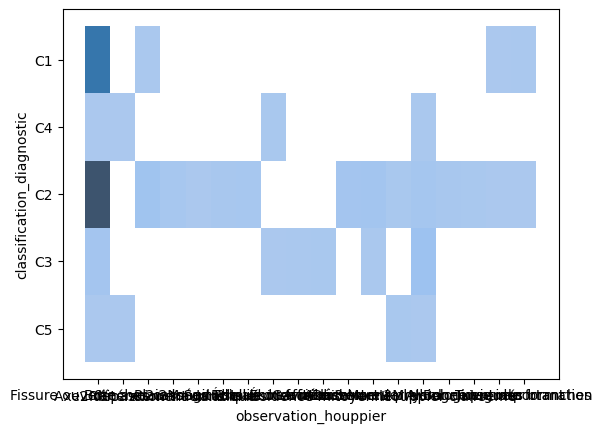

In [8]:
sns.histplot(x=data["observation_houppier"], y=data["classification_diagnostic"])

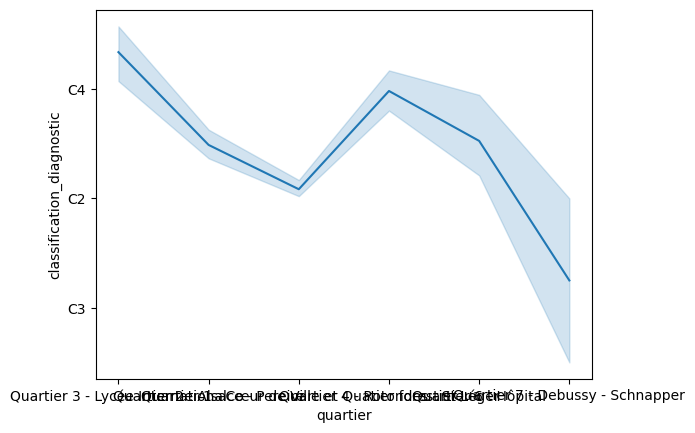

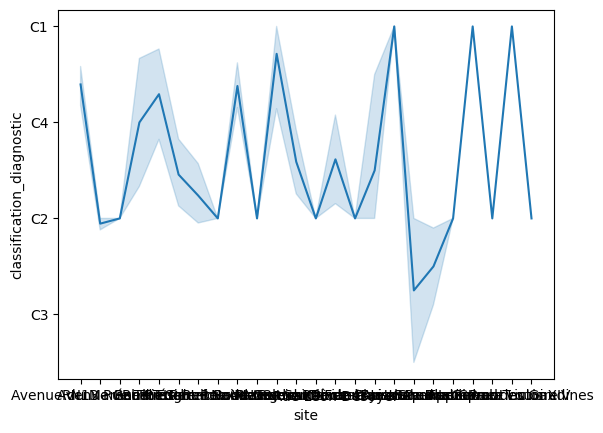

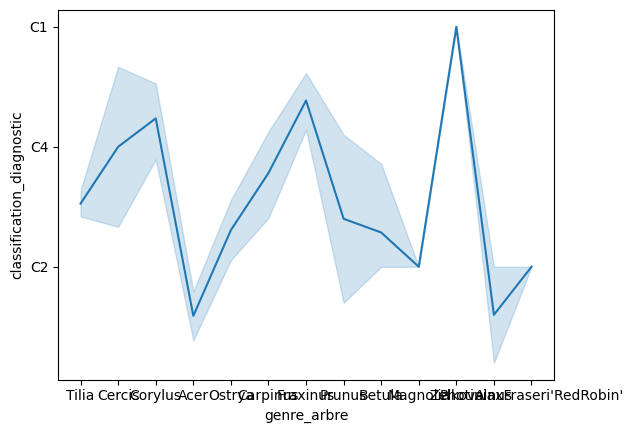

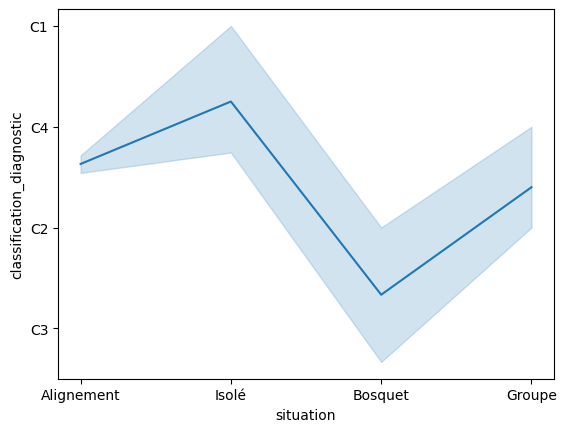

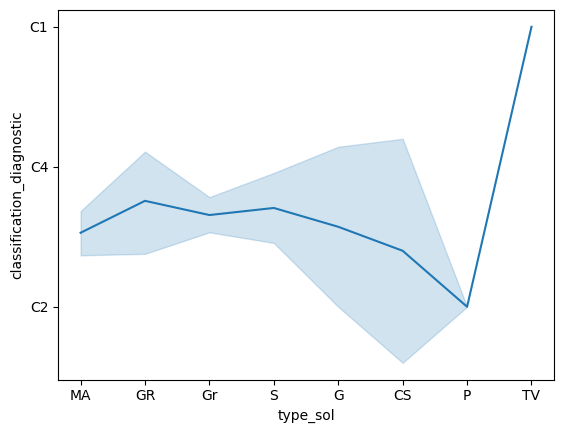

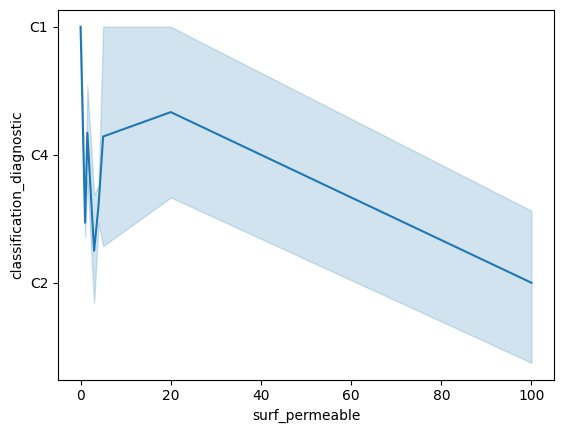

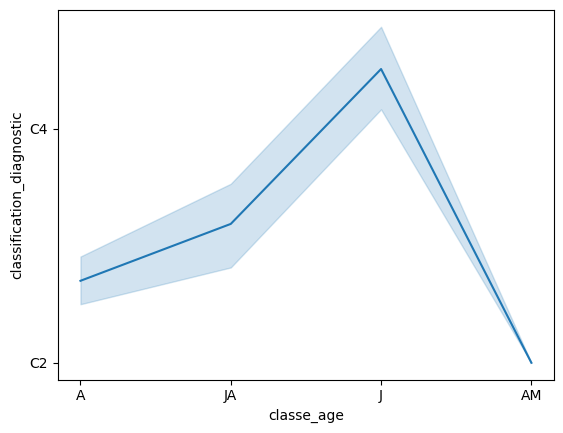

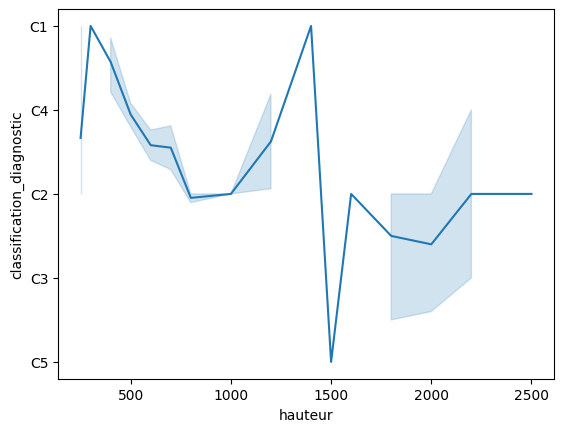

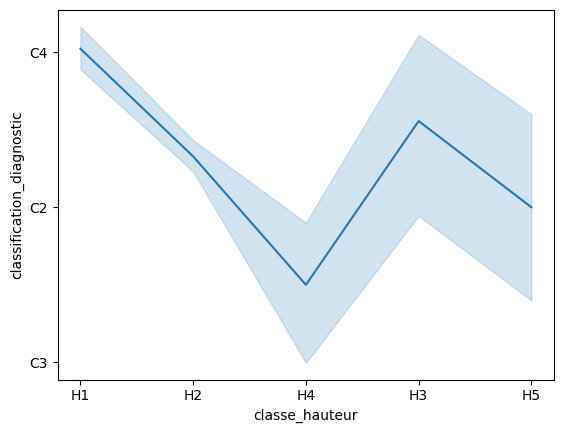

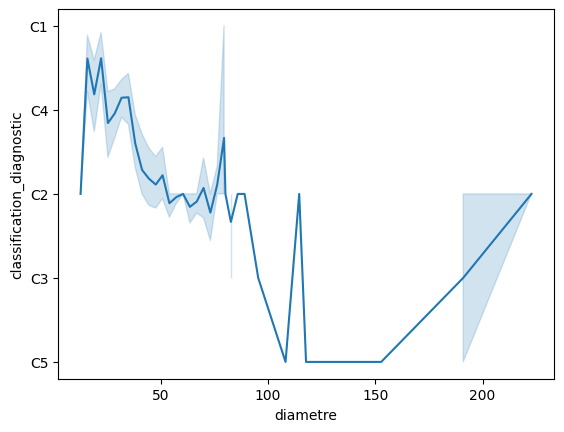

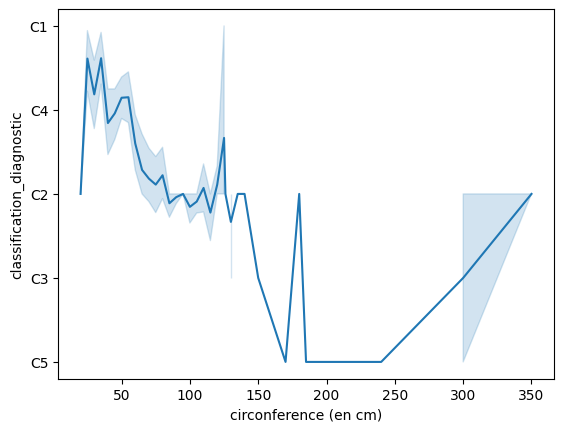

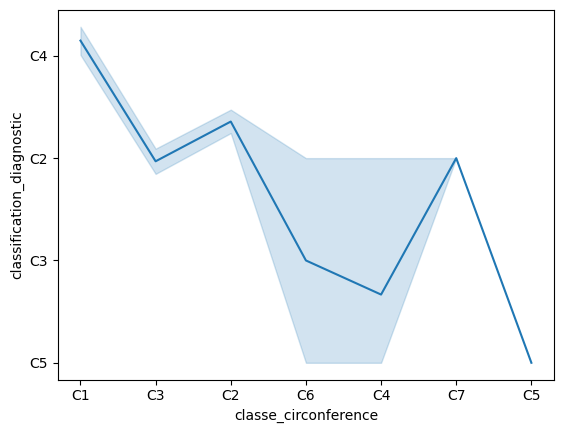

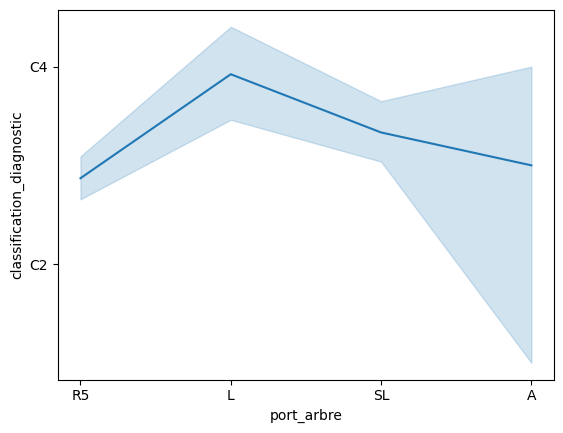

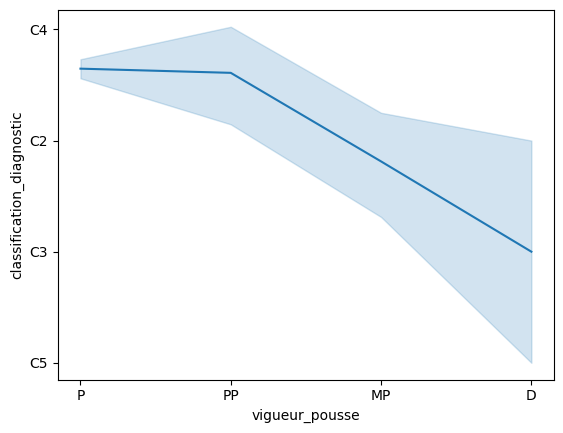

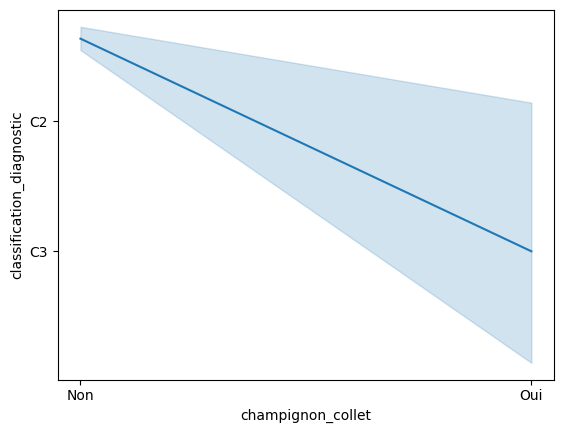

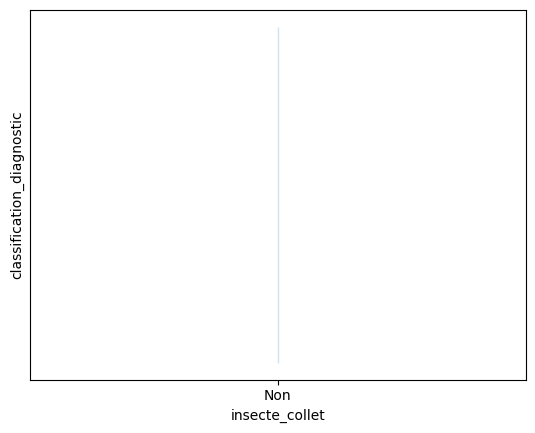

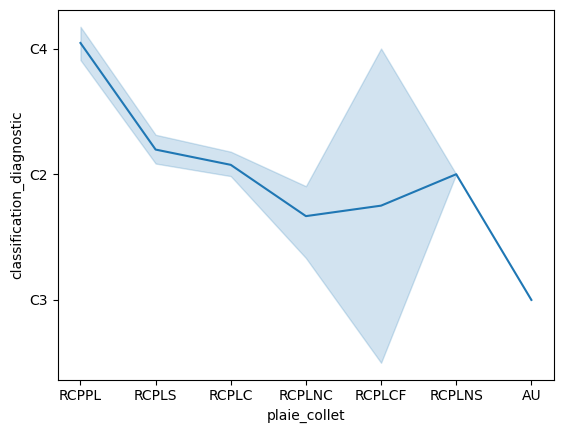

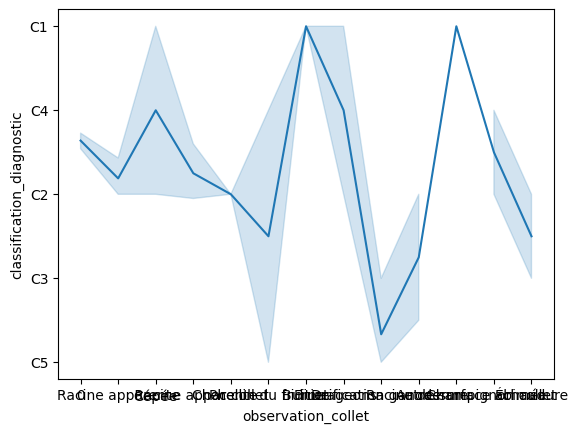

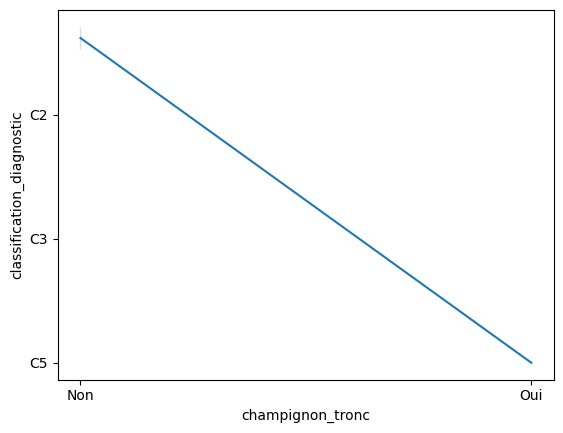

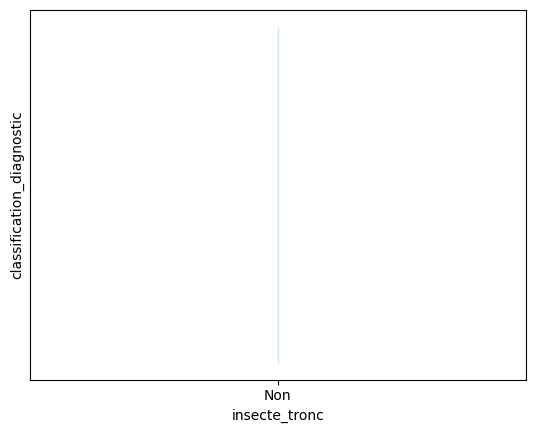

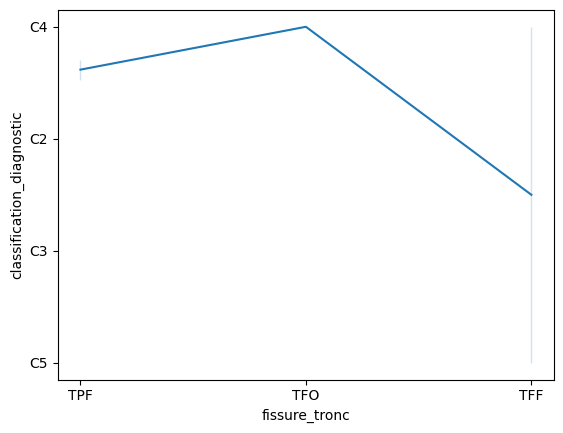

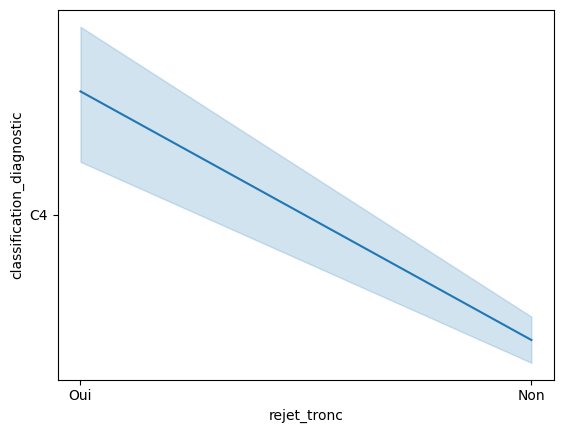

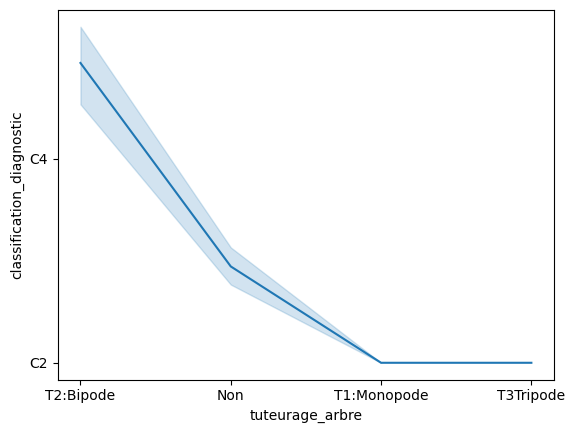

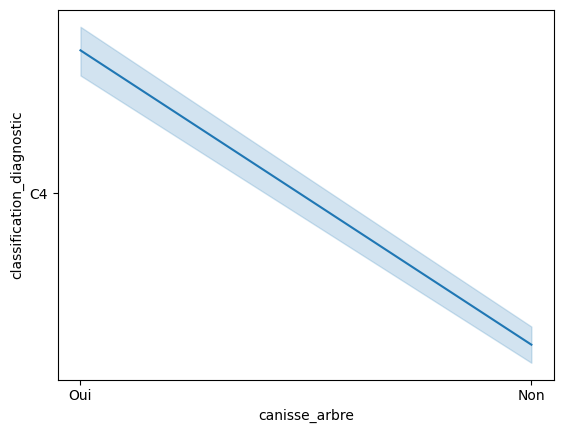

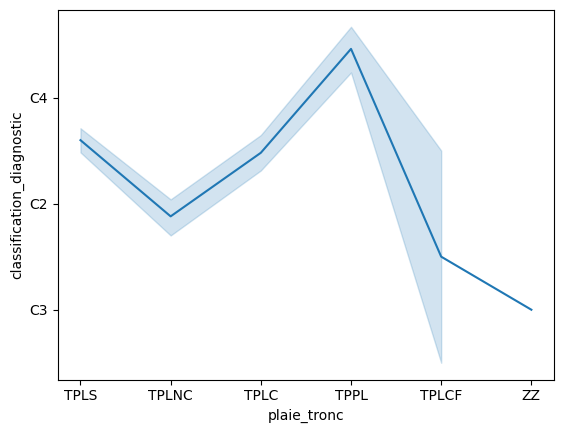

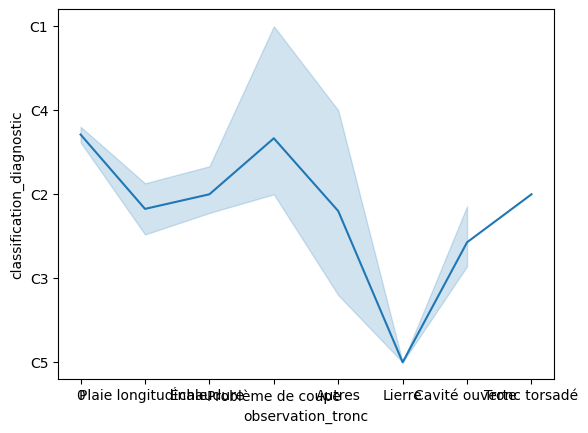

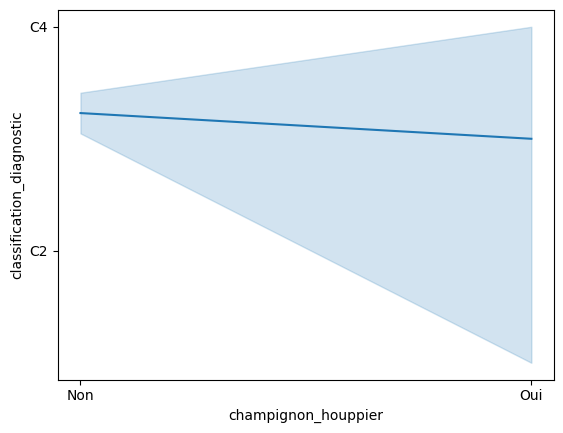

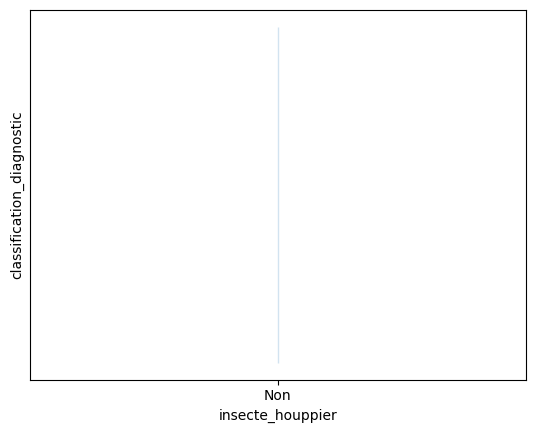

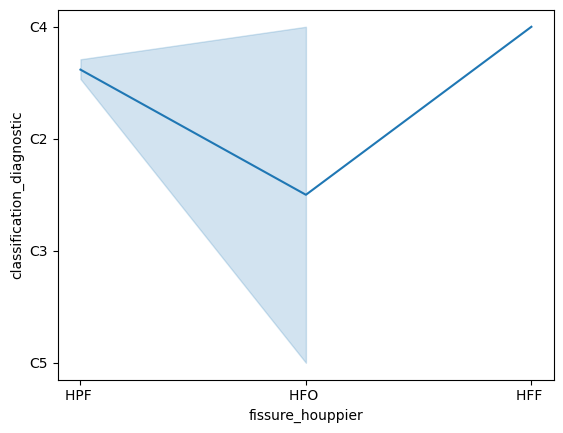

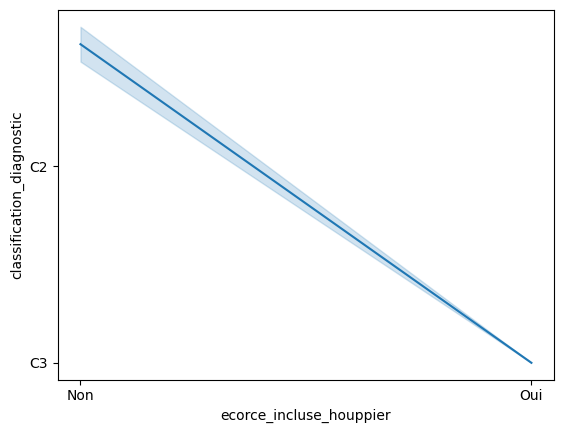

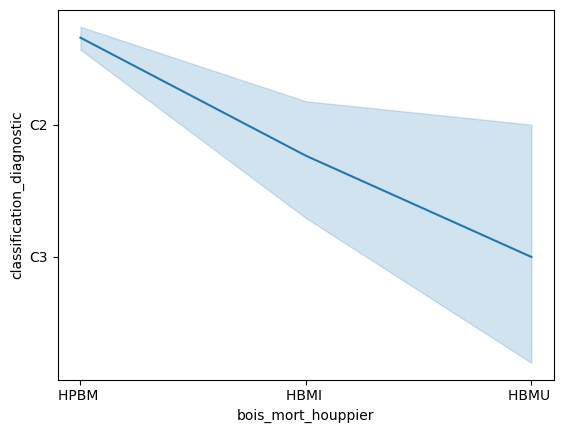

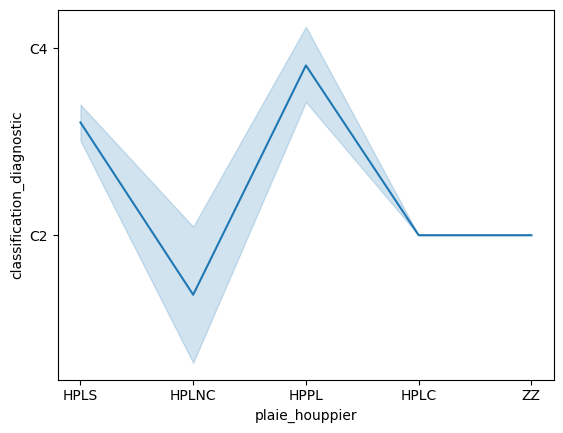

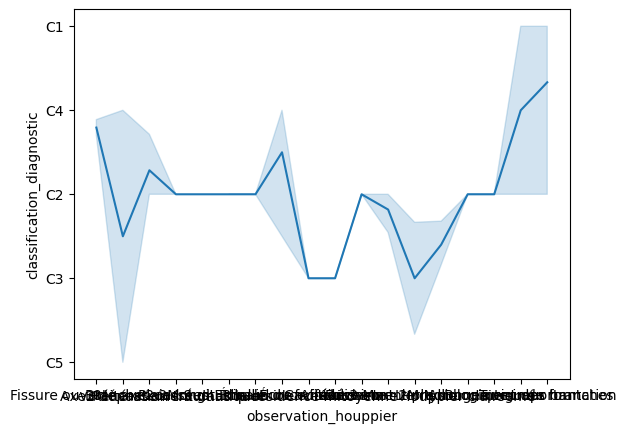

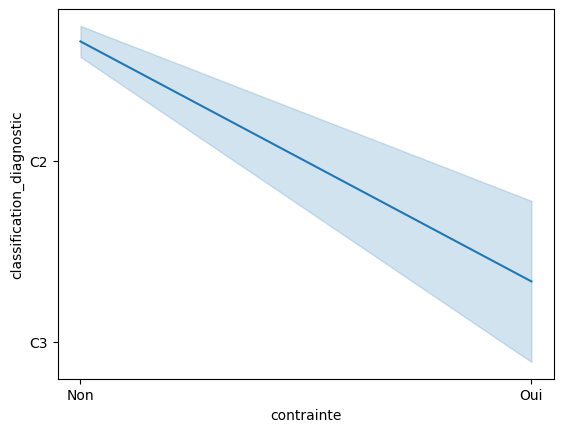

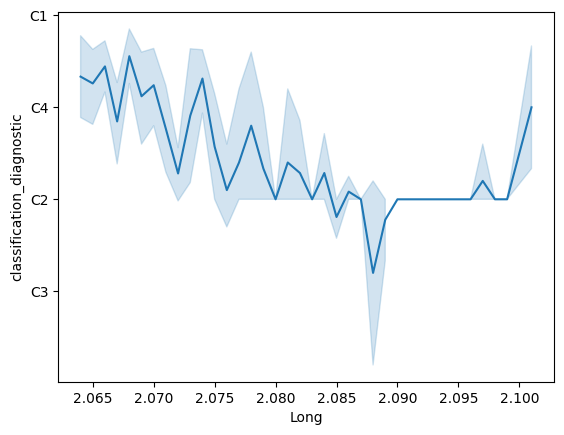

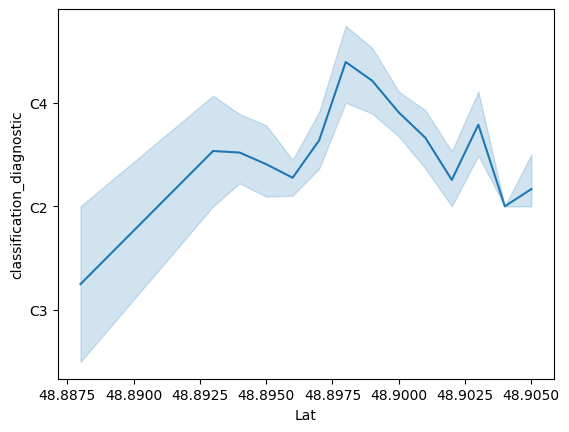

In [9]:
vvars_tout = [var for var in data.columns if var != "classification_diagnostic" and var != "esperance_maintien"]
for var in vvars_tout:
    plt.figure()
    sns.lineplot(x=data[var], y=data["classification_diagnostic"])
    plt.show()

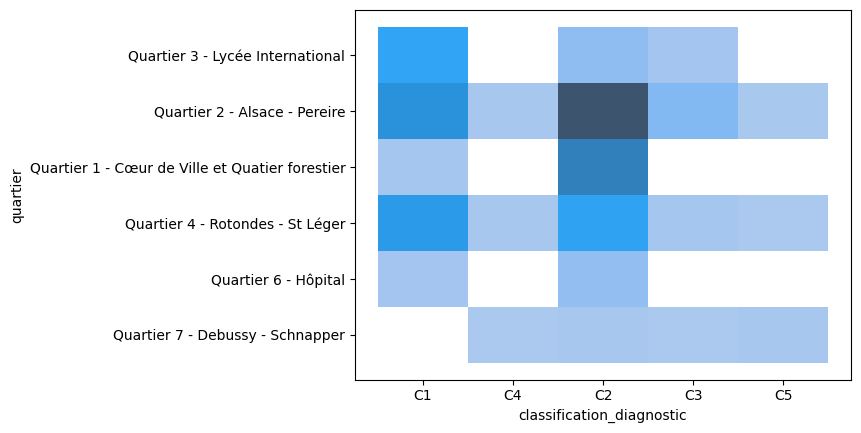

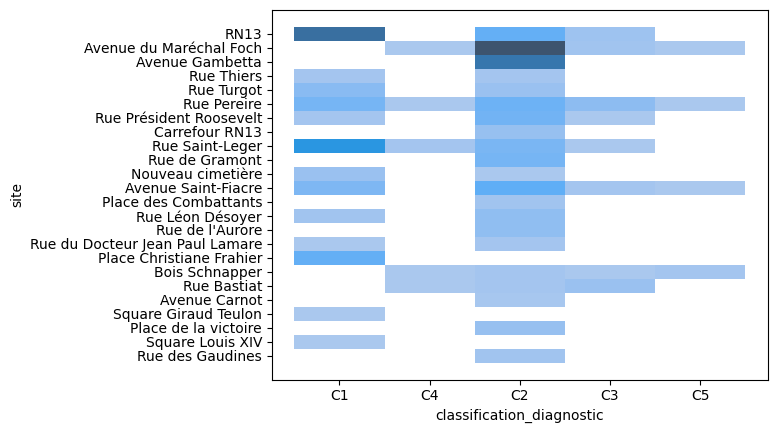

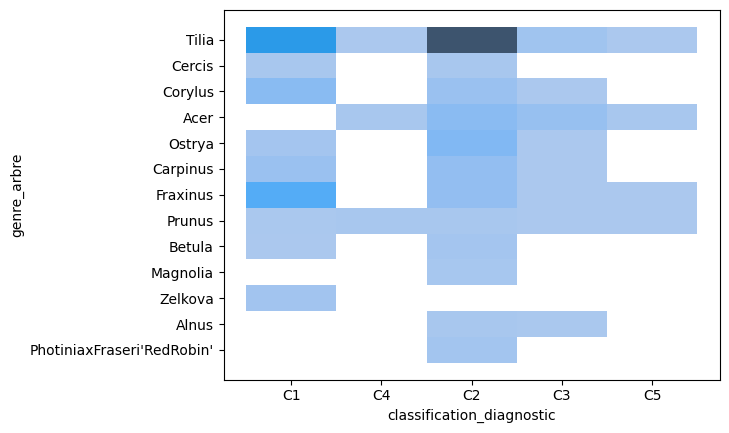

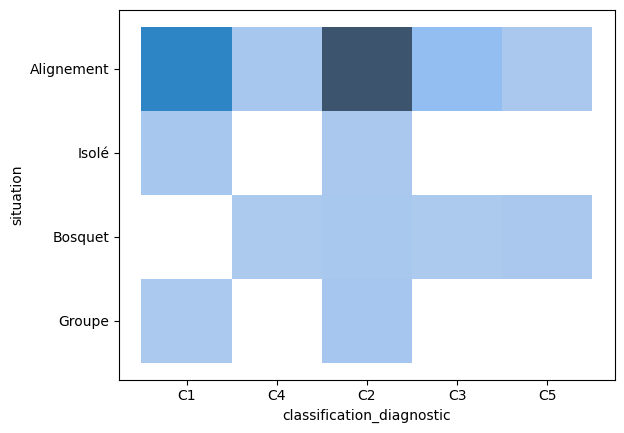

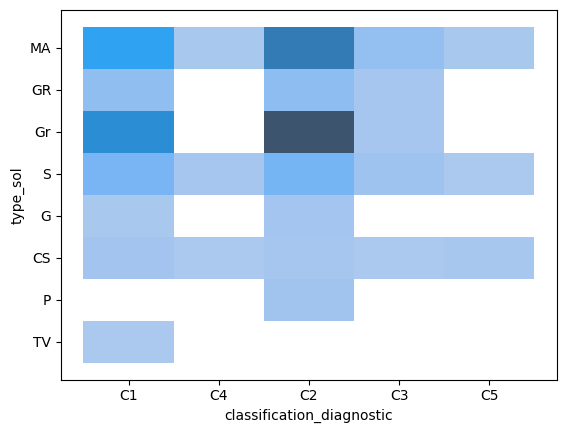

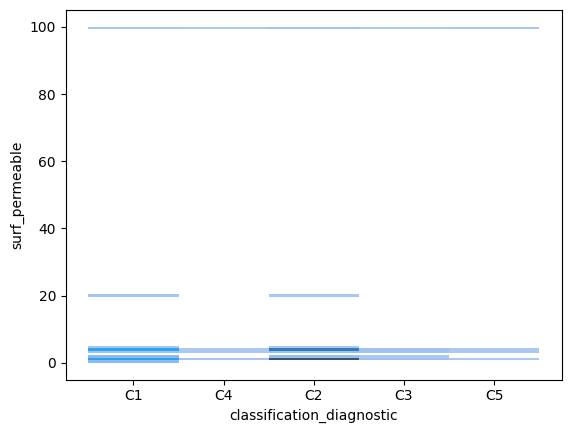

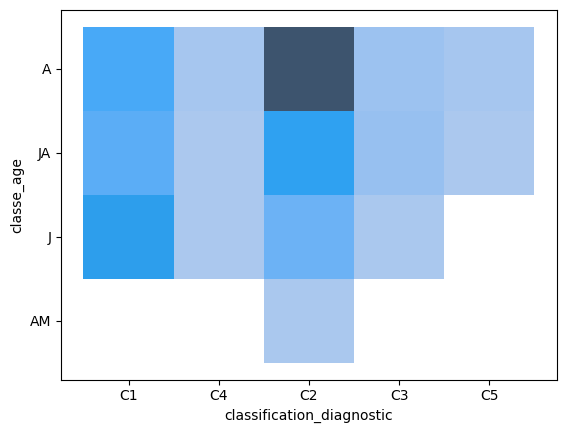

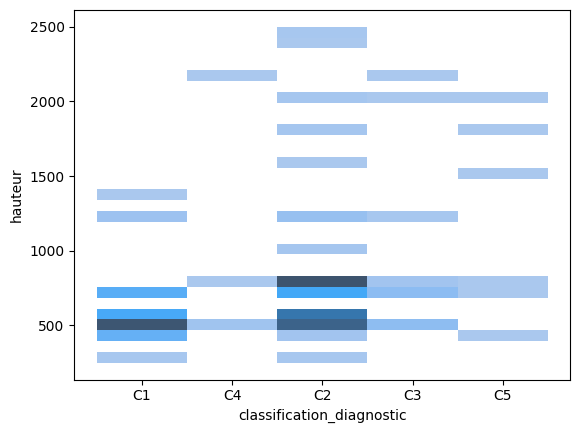

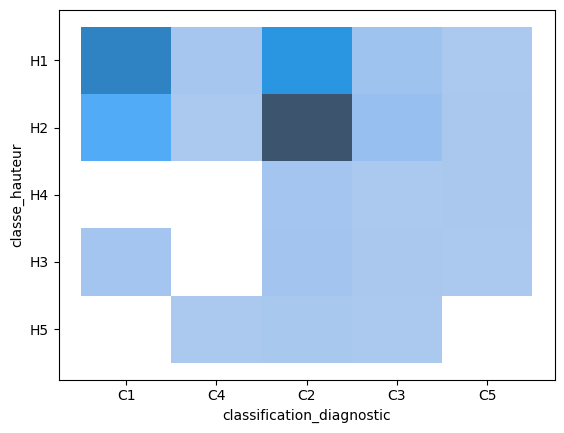

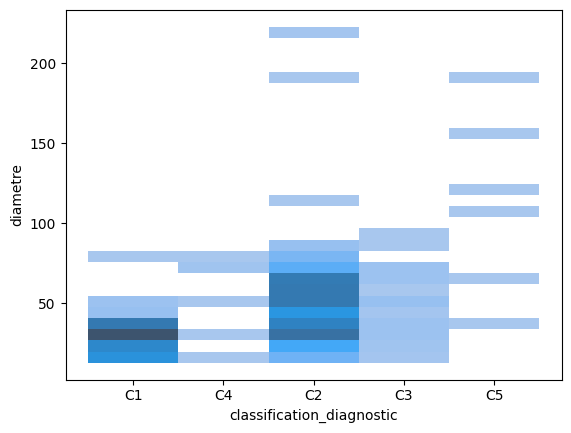

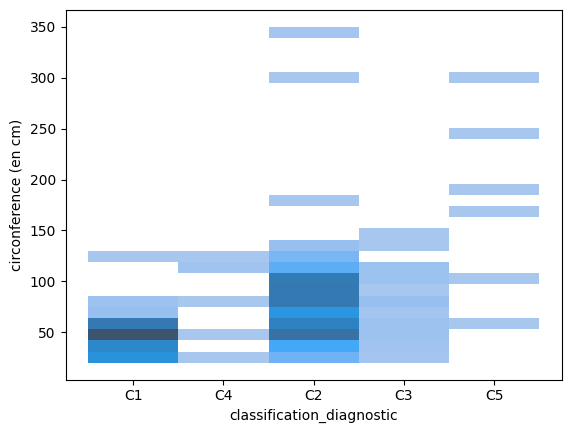

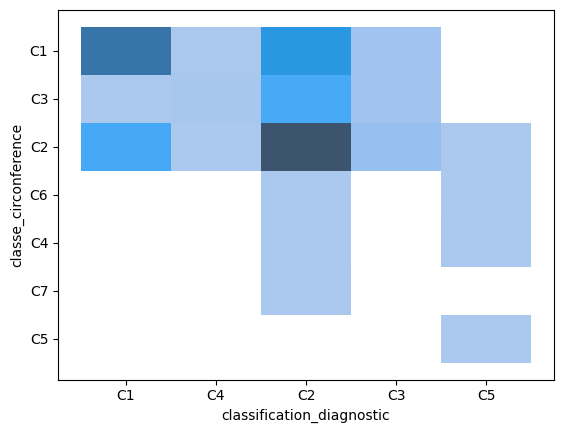

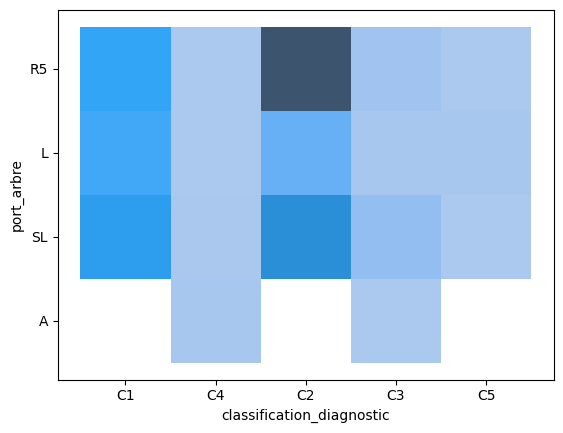

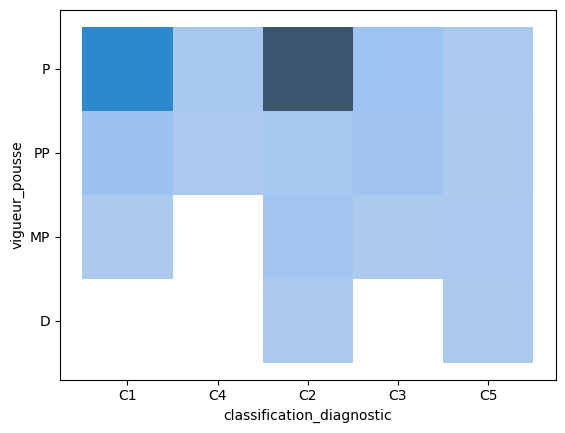

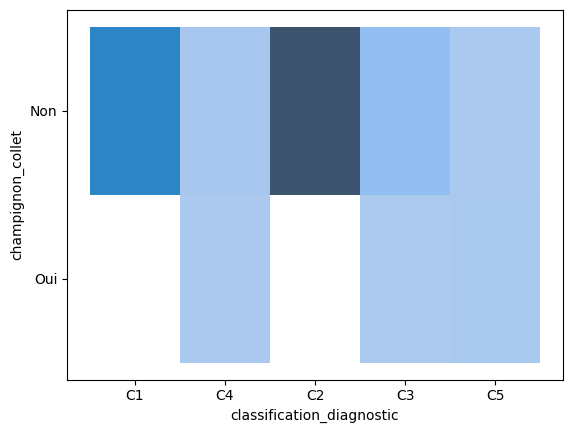

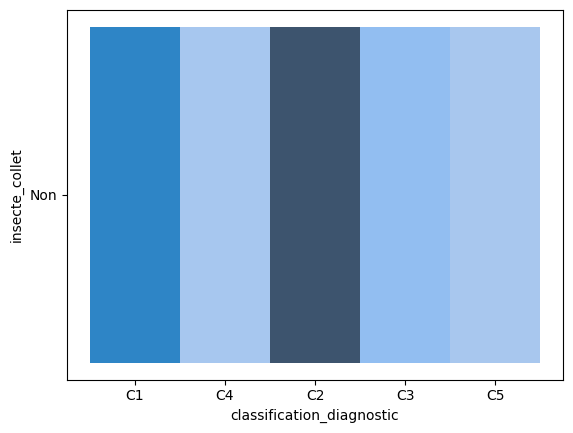

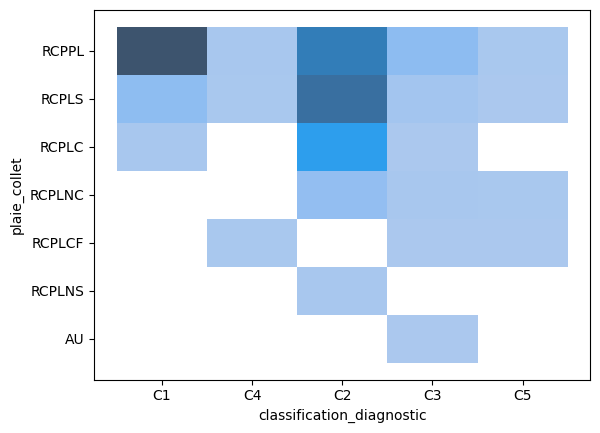

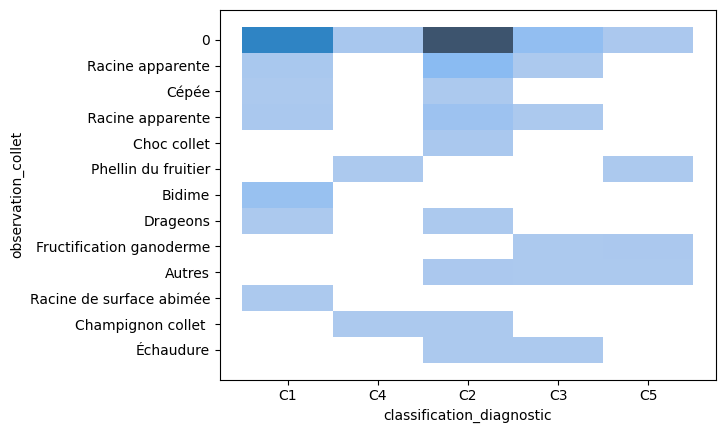

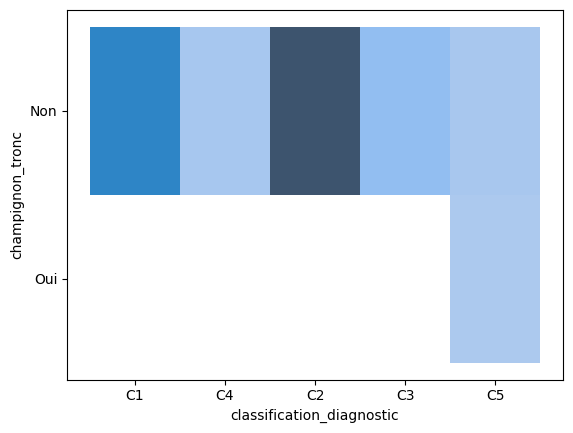

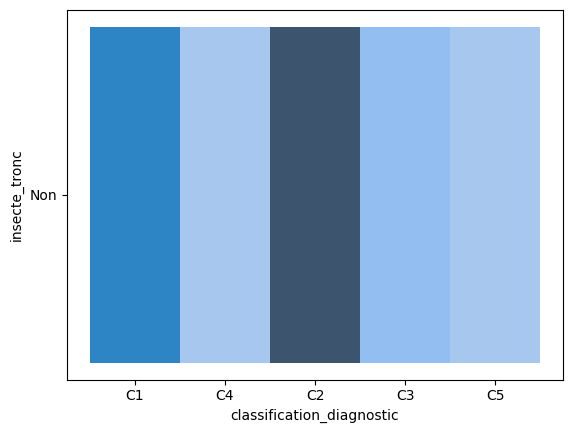

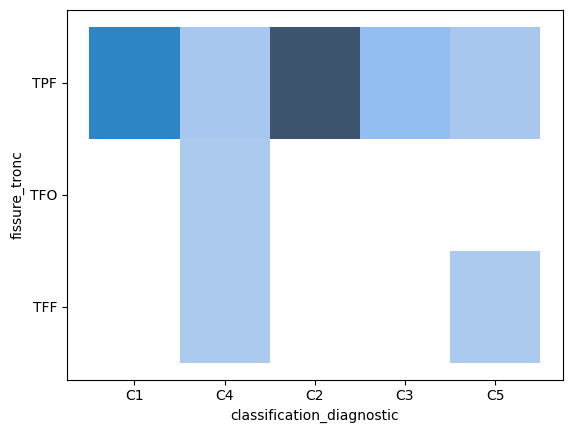

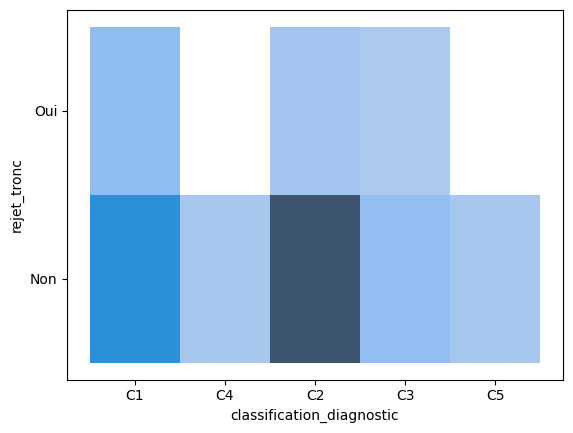

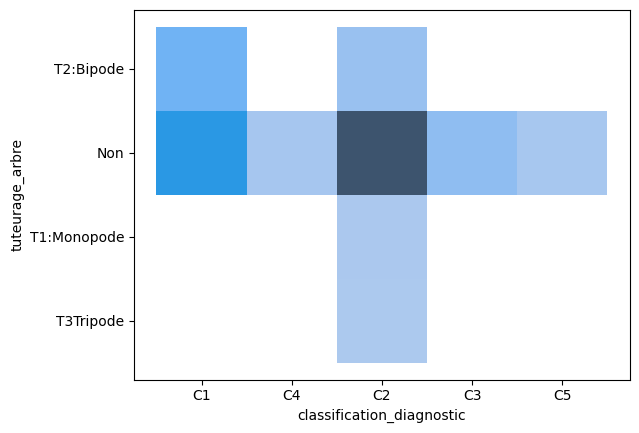

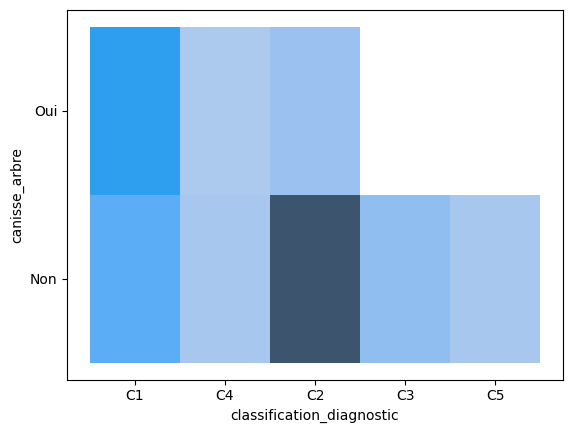

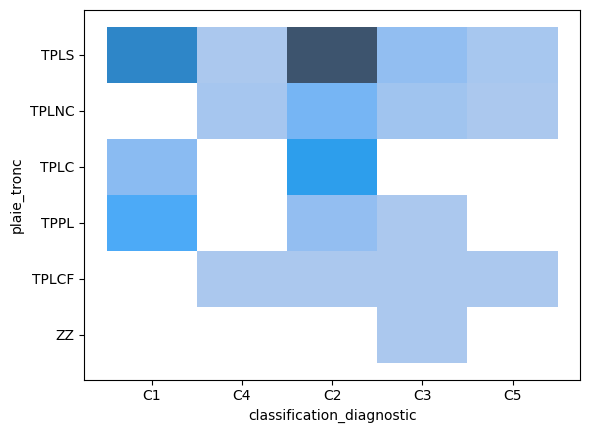

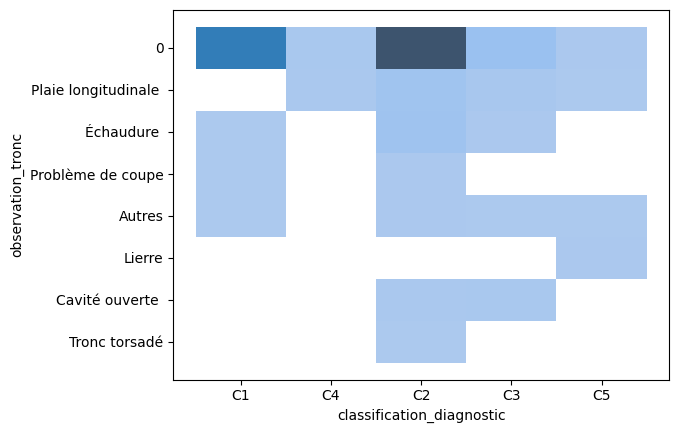

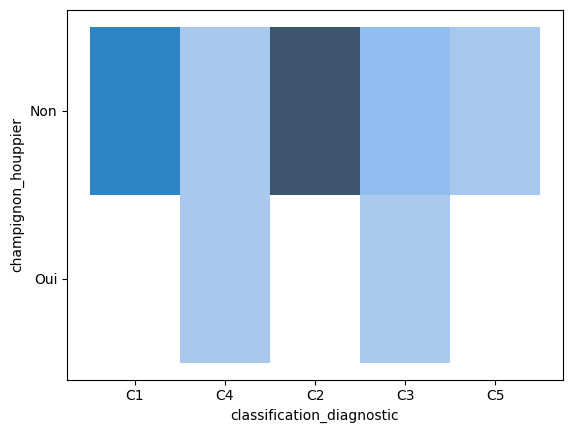

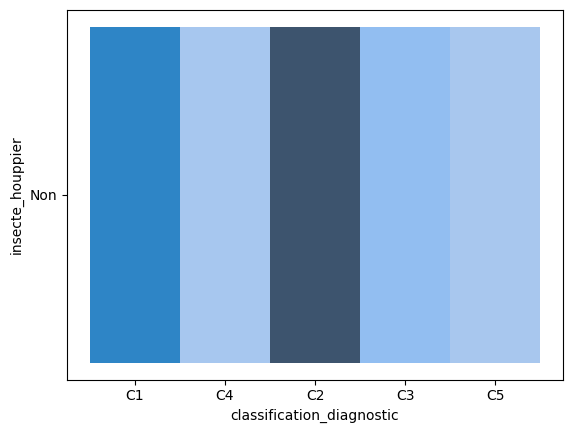

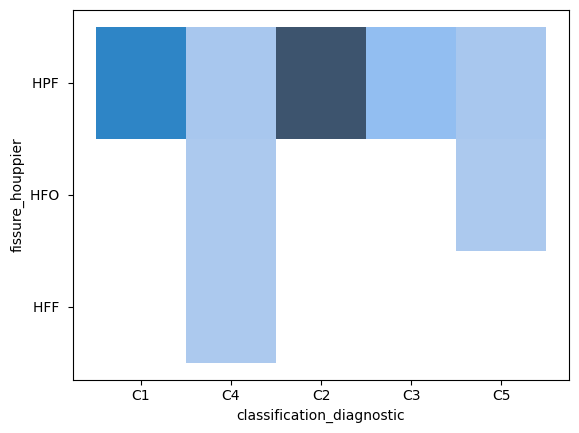

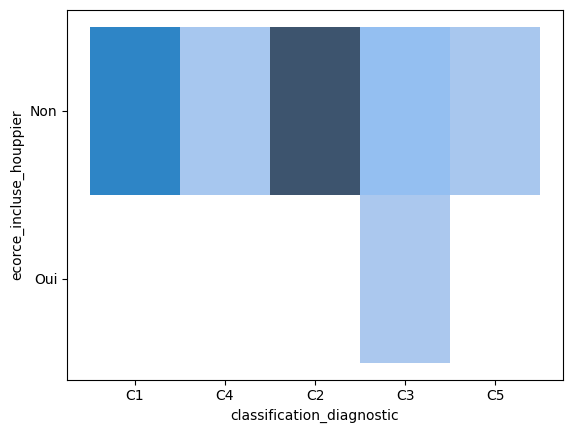

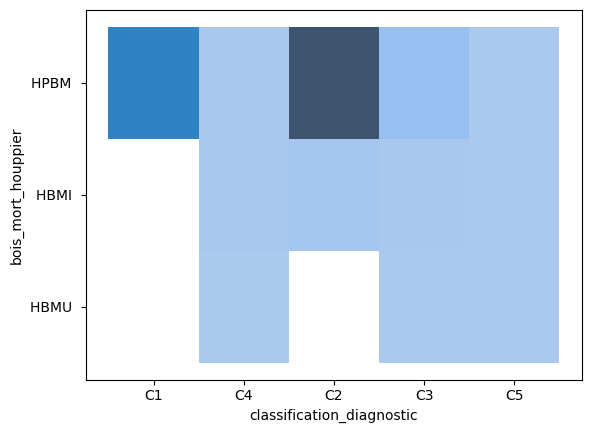

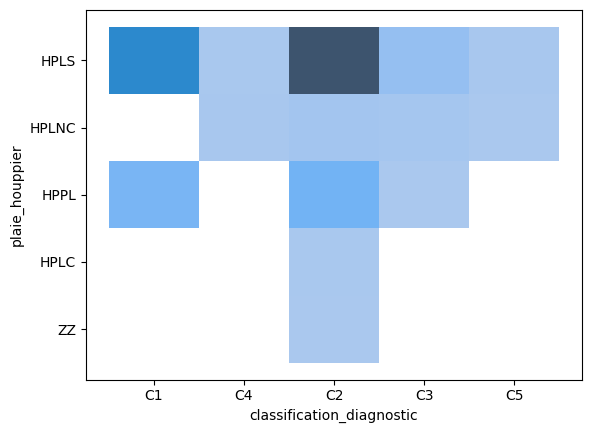

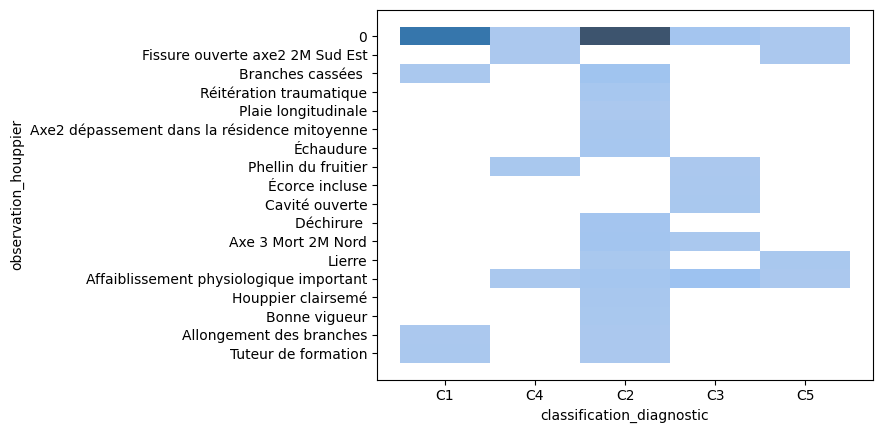

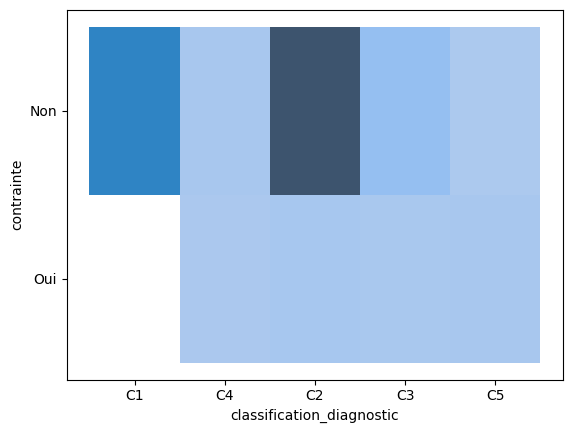

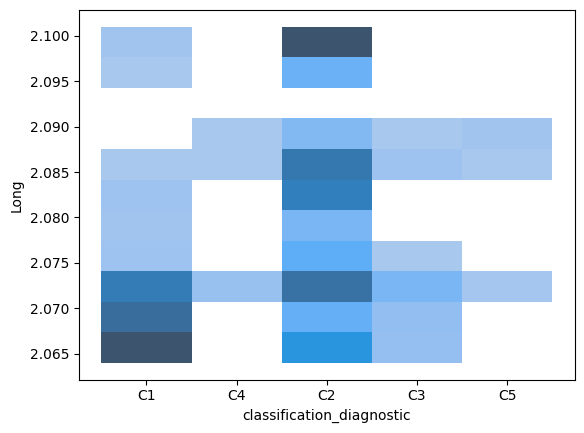

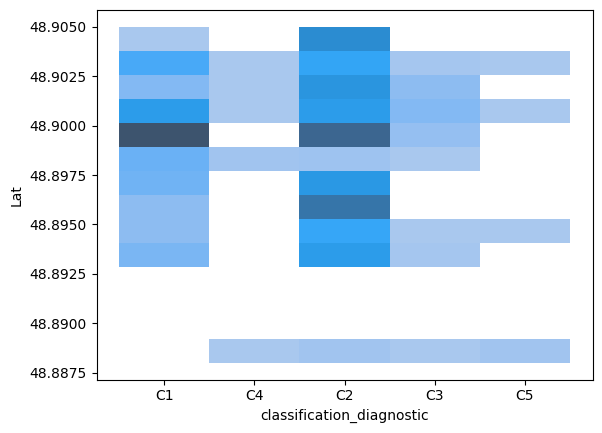

In [58]:
vvars_tout = [var for var in data.columns if var != "classification_diagnostic" and var != "esperance_maintien"]
for var in vvars_tout:
    plt.figure()
    sns.histplot(x=data["classification_diagnostic"], y=data[var])
    plt.show()

In [68]:
var_sans_str = [var for var in data.columns if data[var].dtype != "object"]
var_sans_str

['surf_permeable',
 'hauteur',
 'diametre',
 'circonference (en cm)',
 'esperance_maintien',
 'Long',
 'Lat']

In [62]:
data["classe_age"].dtype 

dtype('O')

In [11]:
#sns.lineplot(x=data["classification_diagnostic"], y=data["classe_age"])

In [12]:

#'champignon_collet', 'genre_arbre', 'circonference (en cm)', 'diametre', 'bois_mort_houppier', 'Lat', 'Long'
#:"hauteur", "circonference (en cm)", "site", "surf_permeable", "observation_houppier", "classe_age", "type_sol", "Lat"

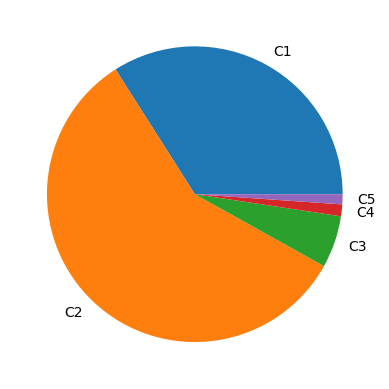

In [13]:
li = []
lilabels = []

for c in np.unique(data['classification_diagnostic']):
    li.append(len(data[data['classification_diagnostic'] == c]))
    lilabels.append(c)
_ = plt.pie(li, labels = lilabels)

<Axes: xlabel='Long', ylabel='Lat'>

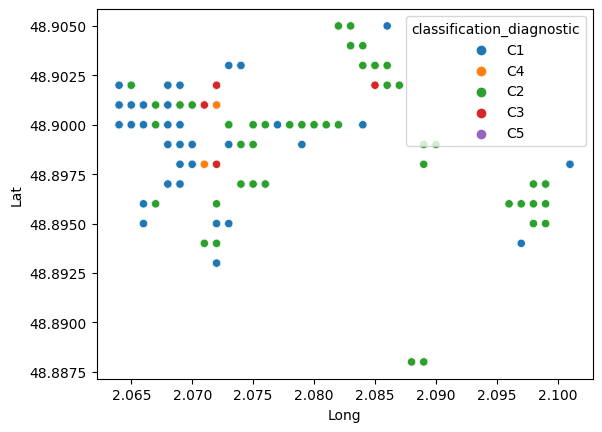

In [7]:
sns.scatterplot(data=data, x='Long', y = 'Lat', hue = 'classification_diagnostic')

In [15]:
### sns.histplot(data=data, x='classe_age', hue='classification_diagnostic')

In [16]:
#sns.histplot(data=data[(data['classification_diagnostic'] != 'C1') & (data['classification_diagnostic'] != 'C2')], x='classe_age', hue='classification_diagnostic')

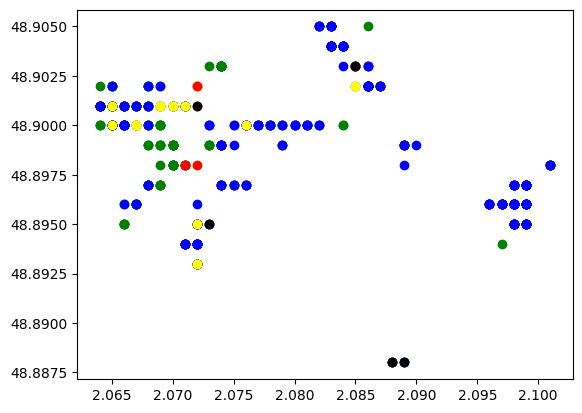

In [6]:
dicocolor = {'C1' : 'green', 'C2' : 'blue', 'C3' : 'yellow', 'C4' : 'red', 'C5' : 'black'}
for c in np.unique(data['classification_diagnostic']):
    _ = plt.scatter(data['Long'][data['classification_diagnostic'] == c], data['Lat'][data['classification_diagnostic'] == c], c = dicocolor[c])

<Axes: xlabel='Long', ylabel='Lat'>

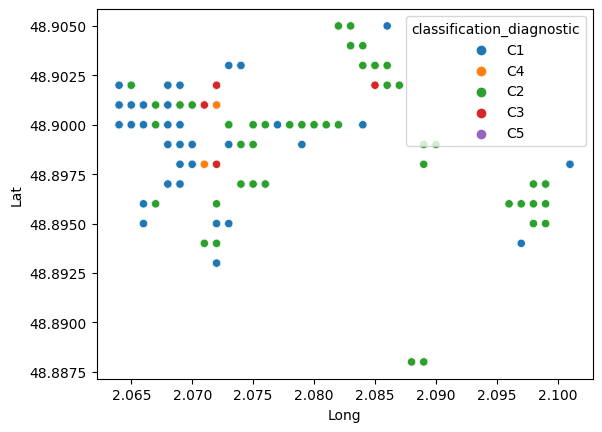

In [20]:
sns.scatterplot(data=data, x='Long', y='Lat', hue='classification_diagnostic')

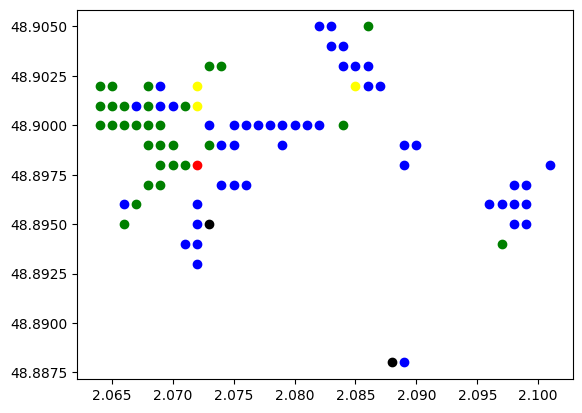

In [21]:
#le nuage de points des arbres selon la longitude et la latitude en prenant pour chaque points la fréquence maximale des classes diagnostiques des arbres de ce point 

def nuage_points(data, x, y):
    '''dessine le nuage de points selon les valeurs x et y des arbres, avec des couleurs différentes pour chaque type
    d'arbres (C1, C2, C3, C4, C5)
    '''
    #construire un dictionnaire avec comme clés les couples (x, y) possibles et comme valeurs, le type d'arbre le plus fréquent pour chaque (x, y)
    dico = {}
    #iterer sur l'ensemble des possibilités pour le couple (x, y)
    for  xind, yind in data[[x, y]].value_counts().index :
            data_x_y = data[(data[x] == xind) & (data[y] == yind)]['classification_diagnostic'].value_counts(sort = True)
            dico[(xind, yind)] = data_x_y.index[0]
    dicocolors = {'C1' : 'green', 'C2' : 'blue', 'C3' : 'yellow', 'C4' : 'red', 'C5' : 'black'}
    for c in np.unique(data['classification_diagnostic']):
        lix = []
        liy = []
        for (xval, yval), cmax in dico.items():
            if cmax == c:
                lix.append(xval)
                liy.append(yval)
        _ = plt.scatter(lix, liy,c = dicocolors[c])

nuage_points(data, 'Long', 'Lat')


In [22]:
data[(data['Long'] == 2.088) &( data['Lat'] == 48.888)]['classification_diagnostic'].value_counts()

classification_diagnostic
C5    2
C3    1
C4    1
C2    1
Name: count, dtype: int64

In [23]:
data[['Long', 'Lat']].value_counts()

Long   Lat   
2.085  48.903    23
2.066  48.900    20
2.086  48.902    20
2.072  48.894    19
2.074  48.903    19
                 ..
2.069  48.898     1
2.089  48.898     1
2.086  48.905     1
2.072  48.896     1
2.073  48.903     1
Name: count, Length: 83, dtype: int64

<Axes: xlabel='hauteur', ylabel='diametre'>

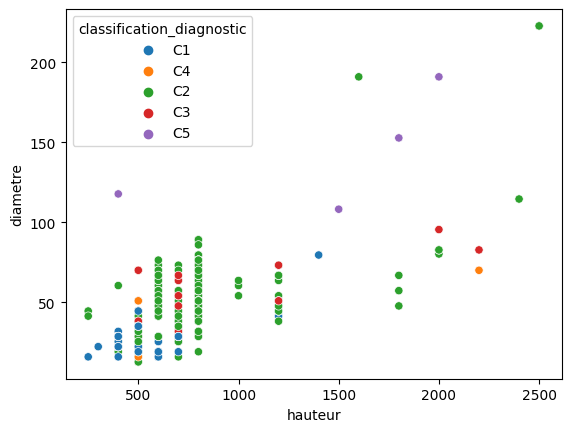

In [24]:
sns.scatterplot(data=data, x='hauteur', y = 'diametre',hue = 'classification_diagnostic')

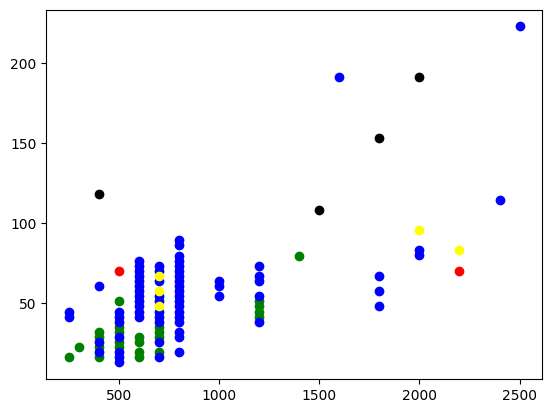

In [25]:
#le nuage de points des arbres selon le diametre et la hauteur en prenant pour chaque point la fréquence maximale des classes diagnostiques des arbres de ce point 
dicocolors = {' " C1' : 'green', 'C2' : 'blue', 'C3' : 'yellow', 'C4' : 'red', 'C5' : 'black'}
nuage_points(data, 'hauteur', 'diametre')

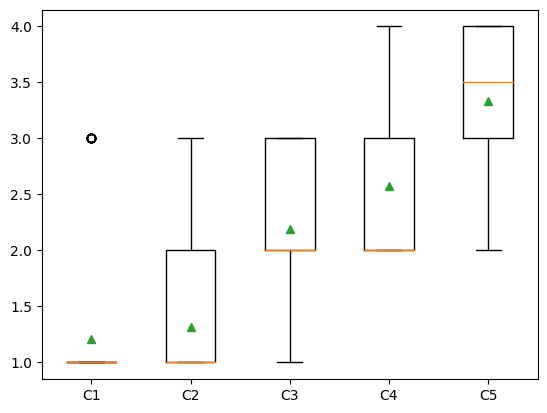

In [26]:
_ = plt.boxplot([data['esperance_maintien'][data['classification_diagnostic'] == c] for c in ['C1', 'C2', 'C3', 'C4', 'C5']],\
                labels = ['C1', 'C2', 'C3', 'C4', 'C5'], showmeans = True)
#_ = plt.boxplot(data['diametre'])
#_ = plt.boxplot(data['esperance_maintien'])

In [27]:
np.mean(data['esperance_maintien'][data['classification_diagnostic'] == 'C5'])

3.3333333333333335

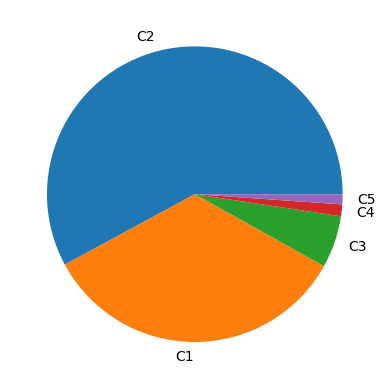

In [28]:
_ = plt.pie(data['classification_diagnostic'].value_counts(),labels = data['classification_diagnostic'].value_counts().index)